
## ### Write code toCompute information Gain given a pair of  input attributes and output

In [1]:
import pandas as pd
import numpy as np

# Function to compute entropy
def entropy(target_col):
    elements,counts = np.unique(target_col, return_counts = True)
    entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

# Function to compute information gain
def InfoGain(data, split_attribute_name, target_name="class"):
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

data = pd.read_csv('./tennis.csv')
print(data.head())

print("Columns in the data:", data.columns)

# Specify the column names
feature_columns = ['Outlook', 'Temperature', 'Humidity' ,'Windy']
target_column = 'Play'

# Compute and print the information gain for each feature column
for feature in feature_columns:
    print(f"Information Gain for {feature} is: {InfoGain(data, feature, target_column)}")



    Outlook Temperature Humidity Windy Play
0     Sunny         Hot     High    No   No
1     Sunny         Hot     High   Yes   No
2  Overcast         Hot     High    No  Yes
3     Rainy        Mild     High    No  Yes
4     Rainy        Cool   Normal    No  Yes
Columns in the data: Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')
Information Gain for Outlook is: 0.24674981977443933
Information Gain for Temperature is: 0.02922256565895487
Information Gain for Humidity is: 0.15183550136234159
Information Gain for Windy is: 0.04812703040826949


## Build a tree using sklearn (with AI assistant, with a caveat). 

    Outlook Temperature Humidity Windy Play
0     Sunny         Hot     High    No   No
1     Sunny         Hot     High   Yes   No
2  Overcast         Hot     High    No  Yes
3     Rainy        Mild     High    No  Yes
4     Rainy        Cool   Normal    No  Yes


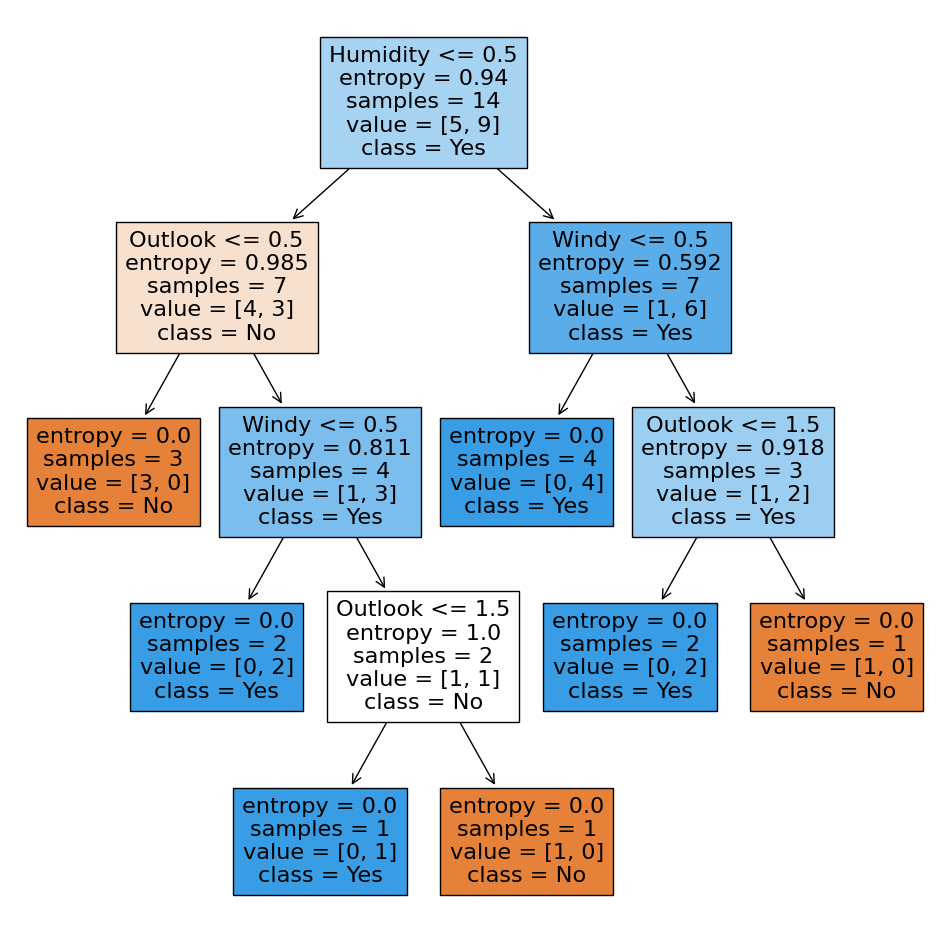

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

data = pd.read_csv('./tennis.csv')
print(data.head())

data_df = pd.DataFrame(data)

# Mapping categorical variables to int
mapping = {
    'Outlook': {'Sunny': 0, 'Overcast': 1, 'Rainy': 2},
    'Temperature': {'Hot': 0, 'Mild': 1, 'Cool': 2},
    'Humidity': {'High': 0, 'Normal': 1},
    'Windy': {'No': 0, 'Yes': 1},
    'Play': {'No': 0, 'Yes': 1}
}

for col, col_mapping in mapping.items():
    data_df[col] = data_df[col].map(col_mapping)

# Fitting a decision tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(data_df[['Outlook', 'Temperature', 'Humidity', 'Windy']], data_df['Play'])

# Plotting the tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'], 
               class_names=['No', 'Yes'], filled=True)
plt.show()


##  Usage of le = LabelEncoder() to not hard code like above and using a testing and traing data method for bigger applications 

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('./tennis.csv')
print(data.head())

data_df = pd.DataFrame(data)

le = LabelEncoder()
df_encoded = data.apply(le.fit_transform)

X = df_encoded.drop(columns='Play')
y = df_encoded['Play']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")



r = export_text(clf, feature_names=list(X.columns))
print(r)




    Outlook Temperature Humidity Windy Play
0     Sunny         Hot     High    No   No
1     Sunny         Hot     High   Yes   No
2  Overcast         Hot     High    No  Yes
3     Rainy        Mild     High    No  Yes
4     Rainy        Cool   Normal    No  Yes
Accuracy: 60.00%
|--- Humidity <= 0.50
|   |--- Outlook <= 1.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Windy >  0.50
|   |   |   |--- class: 0
|   |--- Outlook >  1.50
|   |   |--- class: 0
|--- Humidity >  0.50
|   |--- class: 1



## Write code to evaluate model performance given prediction and true labels 

Accuracy: 0.70
Precision: 0.67
Recall: 0.80
F1 Score: 0.73
Confusion Matrix: 
[[3 2]
 [1 4]]
True Positives: 4
True Negatives: 3
False Positives: 2
False Negatives: 1
True Positive Rate (Sensitivity/Recall): 0.80
False Positive Rate: 0.40
Negative Predictive Value: 0.75
Specificity (True Negative Rate): 0.60


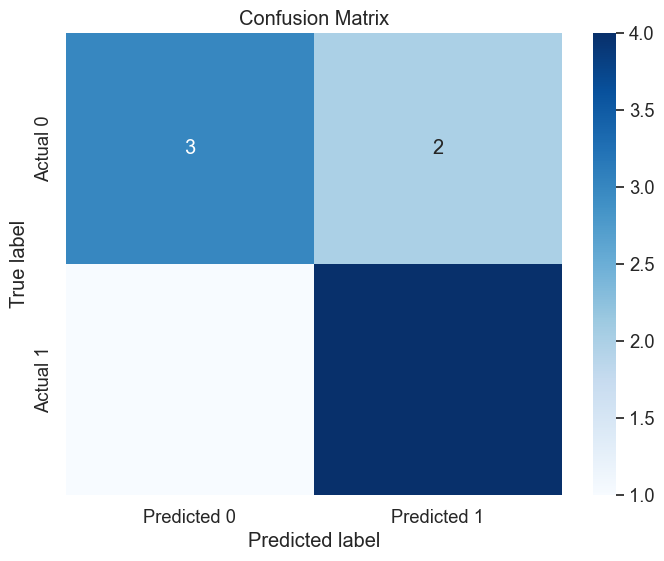

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Given data
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

# Calculating metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Displaying basic metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Calculating and Displaying Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(f"Confusion Matrix: \n{conf_matrix}")

# Elements of Confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Additional Metrics
# True Positive Rate (Recall or Sensitivity)
TPR = TP / (TP + FN)
print(f"True Positive Rate (Sensitivity/Recall): {TPR:.2f}")

# False Positive Rate
FPR = FP / (FP + TN)
print(f"False Positive Rate: {FPR:.2f}")

# Negative Predictive Value
NPV = TN / (TN + FN)
print(f"Negative Predictive Value: {NPV:.2f}")

# Specificity
specificity = TN / (TN + FP)
print(f"Specificity (True Negative Rate): {specificity:.2f}")

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


